#Regression

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error, explained_variance_score, mean_absolute_percentage_error
import wandb

In [2]:
# Initialize Weights & Biases (optional)
# wandb.init(project="california-housing")

In [3]:
# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Target variable

# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Build the model
housing_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    # First hidden layer
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    # Second hidden layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    # Third hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),

    # Fourth hidden layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),

    # Output layer
    tf.keras.layers.Dense(1)
])

# Compile model
housing_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', tf.keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [5]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Reduce learning rate if validation loss plateaus
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

In [6]:
history = housing_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 3.4997 - mae: 1.5279 - root_mean_squared_error: 1.8524 - val_loss: 0.7055 - val_mae: 0.5691 - val_root_mean_squared_error: 0.8399 - learning_rate: 0.0010
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8282 - mae: 0.6798 - root_mean_squared_error: 0.9093 - val_loss: 0.4575 - val_mae: 0.4654 - val_root_mean_squared_error: 0.6764 - learning_rate: 0.0010
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6503 - mae: 0.6037 - root_mean_squared_error: 0.8063 - val_loss: 0.5033 - val_mae: 0.4679 - val_root_mean_squared_error: 0.7095 - learning_rate: 0.0010
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5612 - mae: 0.5568 - root_mean_squared_error: 0.7491 - val_loss: 0.4804 - val_mae: 0.4755 - val_root_mean_squared_error: 0.6931 - learning_rate: 0.0010
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5217 - mae: 0.5299 - root_mean_squared_error: 0.7222 - val_loss: 0.4597 - val_mae

In [8]:
train_predictions = housing_model.predict(X_train_scaled).flatten()
test_predictions = housing_model.predict(X_test_scaled).flatten()

516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [9]:
# Calculate metrics
train_mse = tf.keras.losses.MSE(y_train, train_predictions).numpy()
test_mse = tf.keras.losses.MSE(y_test, test_predictions).numpy()

train_rmse = tf.keras.metrics.RootMeanSquaredError()(y_train, train_predictions).numpy()
test_rmse = tf.keras.metrics.RootMeanSquaredError()(y_test, test_predictions).numpy()

train_mae = tf.keras.losses.MAE(y_train, train_predictions).numpy()
test_mae = tf.keras.losses.MAE(y_test, test_predictions).numpy()

# Additional metrics
train_median_ae = median_absolute_error(y_train, train_predictions)
test_median_ae = median_absolute_error(y_test, test_predictions)

train_explained_var = explained_variance_score(y_train, train_predictions)
test_explained_var = explained_variance_score(y_test, test_predictions)

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

# Print results
print("\n🔹 Training Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"Median Absolute Error: {train_median_ae:.4f}")
print(f"Explained Variance Score: {train_explained_var:.4f}")
print(f"Mean Absolute Percentage Error: {train_mape:.4f}")

print("\n🔹 Test Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"Median Absolute Error: {test_median_ae:.4f}")
print(f"Explained Variance Score: {test_explained_var:.4f}")
print(f"Mean Absolute Percentage Error: {test_mape:.4f}")


🔹 Training Metrics:
MSE: 0.3417
RMSE: 0.5846
MAE: 0.4134
Median Absolute Error: 0.2981
Explained Variance Score: 0.7460
Mean Absolute Percentage Error: 0.2391

🔹 Test Metrics:
MSE: 0.3535
RMSE: 0.5946
MAE: 0.4173
Median Absolute Error: 0.3012
Explained Variance Score: 0.7314
Mean Absolute Percentage Error: 0.2472


In [13]:
import wandb

# Start a new W&B run
wandb.init(project="california-housing-regression")  # use any project name you want

# Then log metrics after computing them
wandb.log({
    "train_mse": train_mse,
    "test_mse": test_mse,
    "train_rmse": train_rmse,
    "test_rmse": test_rmse,
    "train_mae": train_mae,
    "test_mae": test_mae,
    "train_median_ae": train_median_ae,
    "test_median_ae": test_median_ae,
    "train_explained_var": train_explained_var,
    "test_explained_var": test_explained_var,
    "train_mape": train_mape,
    "test_mape": test_mape
})

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: yugm923 (yugm923-san-jose-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [14]:
import wandb

# Initialize W&B run
wandb.init(project="california-housing-regression")

# Save your model in preferred format
housing_model.save("deep_housing_model.keras")

# Save to wandb if needed
wandb.save("deep_housing_model.keras")


test_explained_var,▁
test_mae,▁
test_mape,▁
test_median_ae,▁
test_mse,▁
test_rmse,▁
train_explained_var,▁
train_mae,▁
train_mape,▁
train_median_ae,▁
train_mse,▁


['/content/wandb/run-20250409_025021-vh1ixpqm/files/deep_housing_model.keras']

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,063 (125.25 KB)

 Trainable params: 31,269 (122.14 KB)

 Non-trainable params: 792 (3.09 KB)

 Optimizer params: 2 (12.00 B)

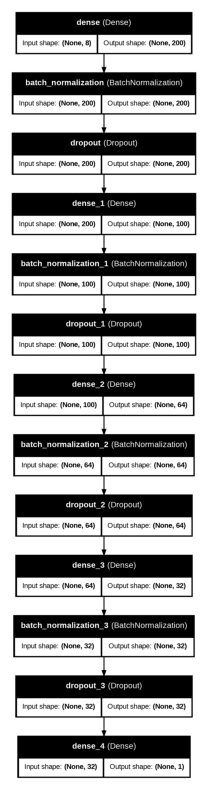

In [17]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Define the custom loss function explicitly
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the trained model with custom objects
housing_model = tf.keras.models.load_model('/content/deep_housing_model.h5', custom_objects=custom_objects)

# Print Model Summary
housing_model.summary()

# Generate and Save Model Diagram
plot_model(housing_model, to_file='housing_model_architecture.png', show_shapes=True, show_layer_names=True)

# Display model architecture image
img = plt.imread('housing_model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()